# 2. Machine Learning Model for Sentiment Classification

In this notebook i:

1. **Load** our preprocessed IMDB reviews  
2. **Split** the data for training
3. **Train** on the training set Using SVC
5. **Evaluation** on the test set:
   - **Accuracy**  
   - **False Positive Rate (FPR)**  
   - **False Negative Rate (FNR)**  
   - **Precision**, **Recall**, **F1-score**  


# Read The Processed Data From MyDrive

In [1]:
# Mount Google Drive so we can access the data
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Read the data
import pandas as pd
file_path = '/content/drive/MyDrive/preprocessed_reviews.csv'
df = pd.read_csv(file_path)

In [4]:
#print the IMDB shape and show the first few rows
print("Loaded DataFrame shape:", df.shape)
df.head()

Loaded DataFrame shape: (50000, 2)


,review,sentiment
0,reviewer mention watch just 1 oz episode you l...,positive
1,wonderful little production filming technique ...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically there s family little boy jake think...,negative
4,petter matteis love time money visually stunni...,positive


# Split the Data Using Stratified Split



```
Stratified splitting ensures each subset (train/test) maintains the same class proportions as the full dataset.
This prevents imbalanced splits and keeps the model evaluation representative of real world label distributions.
```



In [5]:
#split the data into 80% train/ 20% test , stratified split on the target(sentiment)
from sklearn.model_selection import train_test_split

X = df['review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print(f"Train size: {X_train.shape[0]}  Test size: {X_test.shape[0]}")

Train size: 40000  Test size: 10000


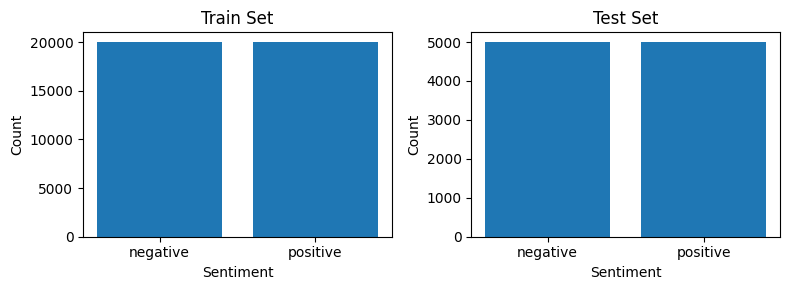

In [7]:
import matplotlib.pyplot as plt

# Side-by-side bar charts for Train vs Test class distribution
fig, axs = plt.subplots(1, 2, figsize=(8, 3), tight_layout=True)

for ax, (name, labels) in zip(axs, [("Train", y_train), ("Test", y_test)]):
    counts = labels.value_counts().sort_index()  # {0: neg_count, 1: pos_count}
    ax.bar(counts.index.astype(str), counts.values)
    ax.set_title(f"{name} Set")
    ax.set_xlabel("Sentiment")
    ax.set_ylabel("Count")

plt.show()


# Train SVC



```
To train SVC, TF–IDF was used because SVMs can only work with numbers, so
it converts each review into a fixed-length numeric vector that highlights
informative terms and down-weights overly common words.

To prevent document length or frequent stop-words from dominating the feature
space, TF–IDF ensures balanced, discriminative inputs for the SVM.
```



In [8]:
# imports for TF–IDF and SVC pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC


In [9]:
# create pipeline for TF–IDF then linear SVC
pipe = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,2), max_df=0.9)),
    ("svc",   LinearSVC(C=1.0, max_iter=10000))
])


In [10]:
# fit pipeline on training data
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.9, ngram_range=(1, 2))),
                ('svc', LinearSVC(max_iter=10000))])

In [11]:
# predict test labels on test set
y_pred = pipe.predict(X_test)

#Evaluations

what is Required -> Report relevant classification metrics such as:
● Accuracy

● False Positive Rate (FPR)

● False Negative Rate (FNR)

● Other relevant metrics


##Confusion Matrix evaluations

In [12]:
# compute confusion matrix entries and basic rates
from sklearn.metrics import confusion_matrix, accuracy_score
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = accuracy_score(y_test, y_pred)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

In [13]:
# print accuracy, false positive rate  and false negative rate
print(f"Accuracy:            {accuracy:.3f}")
print(f"False Positive Rate: {fpr:.3f}")
print(f"False Negative Rate: {fnr:.3f}")


Accuracy:            0.906
False Positive Rate: 0.108
False Negative Rate: 0.080


In [14]:
# print full precision/recall/f1 report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

    negative      0.918     0.892     0.905      5000
    positive      0.895     0.920     0.907      5000

    accuracy                          0.906     10000
   macro avg      0.906     0.906     0.906     10000
weighted avg      0.906     0.906     0.906     10000



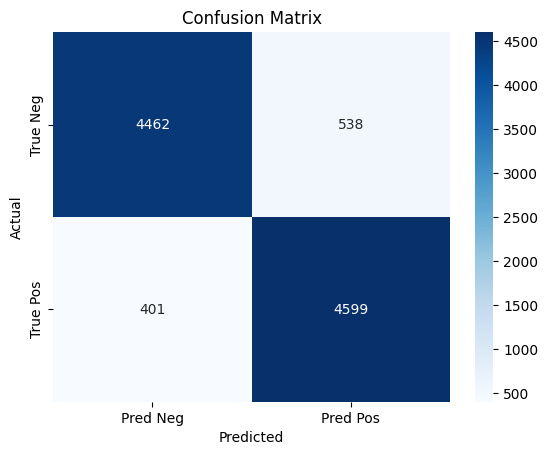

In [15]:
# plot confusion matrix as a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

cm = [[tn, fp],
      [fn, tp]]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred Neg','Pred Pos'],
            yticklabels=['True Neg','True Pos'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


##Other Evaluations

In [18]:
#Other metrices
#ROC AUC -> turn the true labels into binary and feed in the SVM decision scores
from sklearn.metrics import roc_auc_score

y_scores  = pipe.decision_function(X_test)
y_binary  = (y_test == "positive").astype(int)    # 1 for pos, 0 for neg
roc_auc   = roc_auc_score(y_binary, y_scores)
print(f"ROC AUC: {roc_auc:.3f}")


ROC AUC: 0.965


In [19]:
#Other metrices
#balanced accuracy (average of recall for each class)
from sklearn.metrics import balanced_accuracy_score

bal_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {bal_acc:.3f}")

Balanced Accuracy: 0.906
